In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Import the requests library.
import requests
from citipy import citipy
# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73c92ed6edc3f564757ea9883f9acf78


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [12]:
#Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
if (i % 50 == 0 and i >= 50):
    set_count += 1
    record_count = 1
    time.sleep(60)

# Create endpoint URL with each city.
city_url = url + "&q=" + cities[i]

IndentationError: expected an indented block (Temp/ipykernel_4552/2700176561.py, line 5)

In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
  

Processing Record 1 of Set 13 | nikolskoye
Processing Record 2 of Set 13 | bambous virieux
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | geneva
Processing Record 5 of Set 13 | kavieng
Processing Record 6 of Set 13 | tiznit
Processing Record 7 of Set 13 | fairbanks
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | pervoavgustovskiy
Processing Record 10 of Set 13 | chicama
Processing Record 11 of Set 13 | bonthe
Processing Record 12 of Set 13 | brokopondo
Processing Record 13 of Set 13 | andenes
Processing Record 14 of Set 13 | korla
Processing Record 15 of Set 13 | kapaa
Processing Record 16 of Set 13 | nanortalik
Processing Record 17 of Set 13 | barrow
Processing Record 18 of Set 13 | erzin
Processing Record 19 of Set 13 | upernavik
Processing Record 20 of Set 13 | tasiilaq
Processing Record 21 of Set 13 | lagoa
Processing Record 22 of Set 13 | fagundes
Processing Record 23 of Set 13 | lasa
Processing Record 24 of Set 13 | khatanga
Processi

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,34.39,97,100,11.12,RU,2021-12-19 04:22:30
1,Bambous Virieux,-20.3428,57.7575,82.22,69,20,3.44,MU,2021-12-19 04:22:30
2,Bluff,-46.6000,168.3333,70.81,63,51,15.97,NZ,2021-12-19 04:22:31
3,Geneva,41.8875,-88.3054,32.34,70,90,1.99,US,2021-12-19 04:22:31
4,Kavieng,-2.5744,150.7967,82.35,78,100,13.09,PG,2021-12-19 04:22:31
5,Tiznit,29.5833,-9.5000,59.36,46,28,14.09,MA,2021-12-19 04:22:32
6,Fairbanks,64.8378,-147.7164,13.10,84,90,3.44,US,2021-12-19 04:22:32
7,Ushuaia,-54.8000,-68.3000,49.66,76,75,29.93,AR,2021-12-19 04:22:32
8,Pervoavgustovskiy,52.2264,35.0552,29.01,95,100,20.69,RU,2021-12-19 04:22:33
9,Chicama,-7.8447,-79.1469,61.34,85,87,5.64,PE,2021-12-19 04:22:33


In [16]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

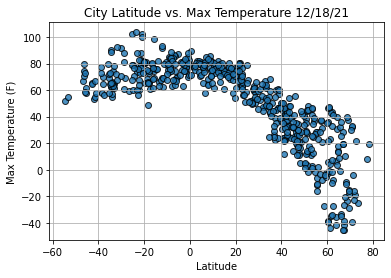

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



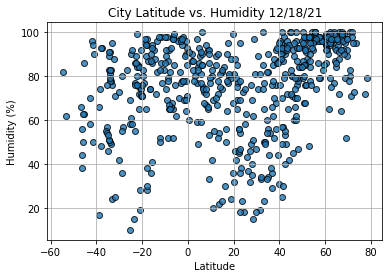

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

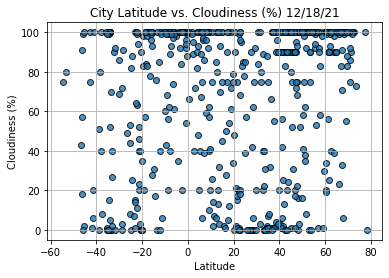

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

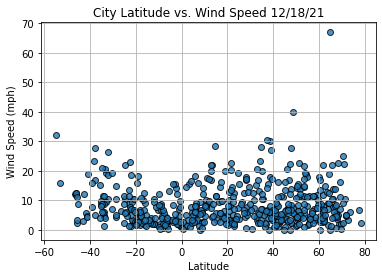

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

SyntaxError: invalid syntax (Temp/ipykernel_12936/2317673131.py, line 3)

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Jamestown,42.0970,-79.2353,36.09,98,90,4.00,US,2021-12-19 03:05:11
2,Okhotsk,59.3833,143.3000,-2.18,97,100,11.72,RU,2021-12-19 03:05:11
3,Garden City,42.3256,-83.3310,34.05,90,90,1.01,US,2021-12-19 03:00:56
4,Someshwar,13.5000,75.0667,74.57,54,3,4.43,IN,2021-12-19 03:05:12
5,Makakilo City,21.3469,-158.0858,77.32,69,75,8.05,US,2021-12-19 03:05:12
...,...,...,...,...,...,...,...,...,...
531,Matara,5.9485,80.5353,78.76,85,100,5.93,LK,2021-12-19 03:08:13
533,Bolshevik,54.0065,27.5692,38.82,93,100,19.37,BY,2021-12-19 03:08:13
534,Key Largo,25.0865,-80.4473,78.98,74,39,15.59,US,2021-12-19 03:08:14
535,Saint-Georges,12.0564,-61.7485,78.91,70,85,17.34,GD,2021-12-19 03:08:14


In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Jamestown,42.0970,-79.2353,36.09,98,90,4.00,US,2021-12-19 03:05:11
2,Okhotsk,59.3833,143.3000,-2.18,97,100,11.72,RU,2021-12-19 03:05:11
3,Garden City,42.3256,-83.3310,34.05,90,90,1.01,US,2021-12-19 03:00:56
4,Someshwar,13.5000,75.0667,74.57,54,3,4.43,IN,2021-12-19 03:05:12
5,Makakilo City,21.3469,-158.0858,77.32,69,75,8.05,US,2021-12-19 03:05:12


In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

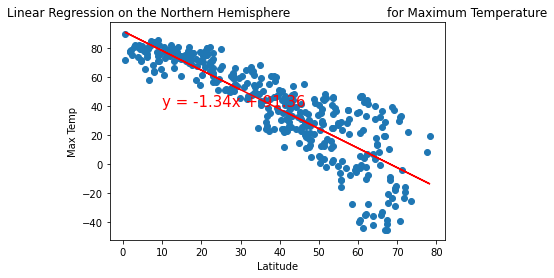

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

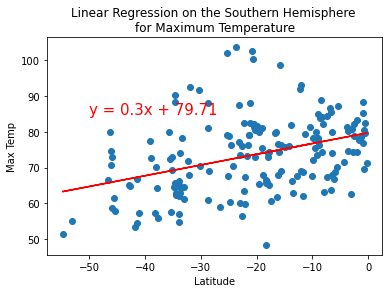

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

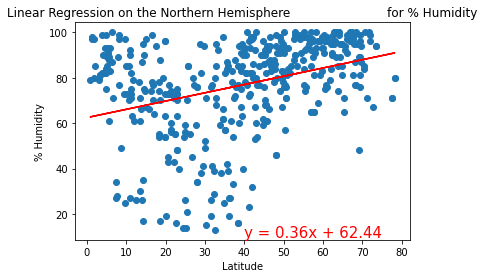

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

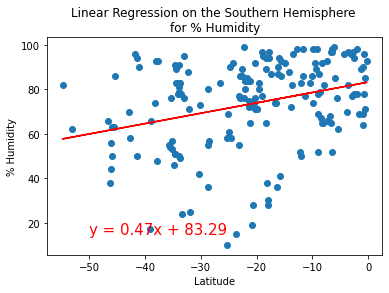

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

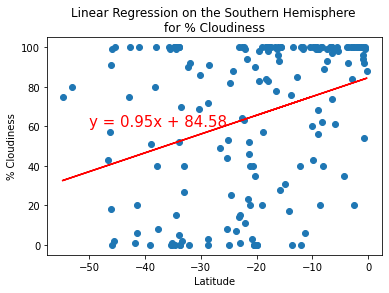

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

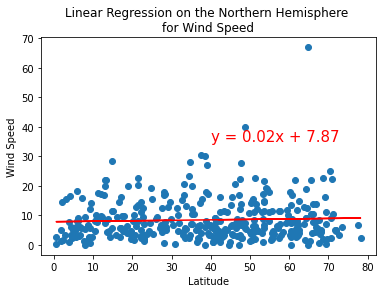

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

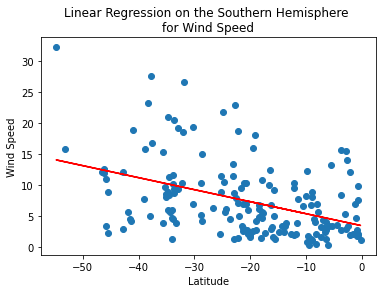

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))